In [2]:
import torch
import tifffile as tiff
import torchvision.transforms as transforms
from diffusers.models import AutoencoderKL

feature_extractor = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse")
feature_extractor = feature_extractor.eval()  

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

2025-05-23 00:32:53.361228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-23 00:32:53.381966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747960373.407524 3168945 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747960373.415136 3168945 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747960373.434203 3168945 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [13]:
image_path = "/workspace/generative_model/data/test/s2_cloudy/ROIs1158_spring_s2_cloudy_31_p39.tif"
image = tiff.imread(image_path)
input_image = torch.unsqueeze(transform(image), dim=0)

with torch.no_grad():
    latent = feature_extractor.encode(input_image[:,:3,:,:]).latent_dist.sample()
    fake_image = feature_extractor.decode(latent).sample

print(latent.shape)
print(fake_image.shape)

torch.Size([1, 4, 32, 32])
torch.Size([1, 3, 256, 256])


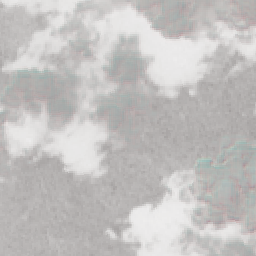

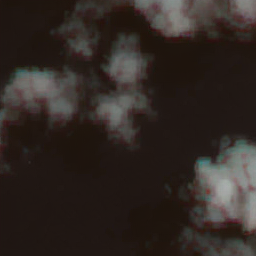

In [14]:
input_image = transforms.ToPILImage()(input_image.squeeze())
fake_image = transforms.ToPILImage()(fake_image.squeeze())
input_image.show()
fake_image.show()